# Level 1 – Task 4: Online Delivery Analysis

## 🔍 Objective:
1. Determine the percentage of restaurants that offer online delivery.
2. Compare the average ratings of restaurants **with** and **without** online delivery.

## 🛠️ Approach:
- Clean and inspect the `Has Online delivery` column.
- Count how many restaurants offer delivery vs not.
- Calculate the percentages.
- Compare average ratings between the two groups.
- Visualize both the distribution and comparison.

## 📈 Insights:
This helps understand how online delivery relates to popularity or customer satisfaction.

Online Delivery Options: ['No' 'Yes']
Online Delivery Distribution:
   Online Delivery  Count  Percentage
0              No   7100   74.337766
1             Yes   2451   25.662234


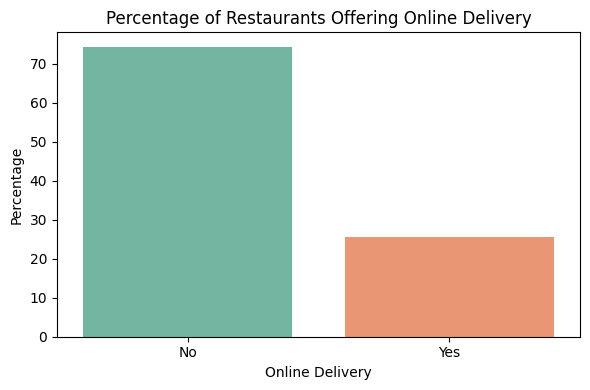

Rating Comparison:
   Online Delivery  Average Rating
0              No        2.465296
1             Yes        3.248837


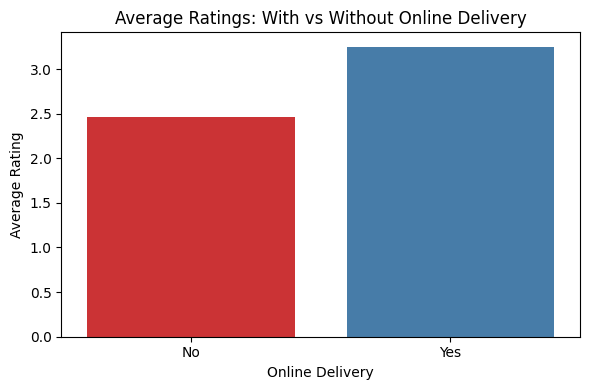

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("../Dataset.csv")

# Clean & check values
print("Online Delivery Options:", df['Has Online delivery'].unique())

# Drop nulls if any
df = df.dropna(subset=['Has Online delivery', 'Aggregate rating'])

# Convert rating to numeric
df['Aggregate rating'] = pd.to_numeric(df['Aggregate rating'], errors='coerce')

# Count delivery vs non-delivery
delivery_counts = df['Has Online delivery'].value_counts()
delivery_df = delivery_counts.reset_index()
delivery_df.columns = ['Online Delivery', 'Count']
delivery_df['Percentage'] = (delivery_df['Count'] / delivery_df['Count'].sum()) * 100

print("Online Delivery Distribution:\n", delivery_df)

# Plot delivery distribution
plt.figure(figsize=(6,4))
sns.barplot(data=delivery_df, x='Online Delivery', y='Percentage', hue='Online Delivery', palette='Set2', legend=False)
plt.title("Percentage of Restaurants Offering Online Delivery")
plt.ylabel("Percentage")
plt.xlabel("Online Delivery")
plt.tight_layout()
plt.show()

# Rating comparison
rating_comparison = df.groupby('Has Online delivery')['Aggregate rating'].mean().reset_index()
rating_comparison.columns = ['Online Delivery', 'Average Rating']

print("Rating Comparison:\n", rating_comparison)

# Plot rating comparison
plt.figure(figsize=(6,4))
sns.barplot(data=rating_comparison, x='Online Delivery', y='Average Rating', hue='Online Delivery', palette='Set1', legend=False)
plt.title("Average Ratings: With vs Without Online Delivery")
plt.ylabel("Average Rating")
plt.xlabel("Online Delivery")
plt.tight_layout()
plt.show()